**********About Dataset**********

**Dependent Column : **
Outcome ( 1: diabetic Patient , 0 : Non-diabetic patient )

**Independent Columns(8) : **

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age

**Aim of the Project** :
**Can you build a model (Machine learning or deep learning ) to accurately predict whether or not the patients in the dataset have diabetes or not?**


In [36]:
#Normal Library
#-----------------------
import numpy as np
import pandas as pd


#Visulization Library
#---------------------
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#--------------------------------
#Warning library
import warnings
warnings.filterwarnings('ignore')


#anova testing
import scipy.stats as stats

#scaling the data
from sklearn.preprocessing import StandardScaler

#Train Test split
from sklearn.model_selection import train_test_split


#ML model - regeression
from sklearn.linear_model import LinearRegression

#ML model - regeression - Performance matrix
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_squared_error



#ML model - Classification

#ML model - Classification - Performance matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score


#Improve the accuracy
from sklearn.model_selection import cross_val_score




In [37]:
df= pd.read_csv(r"/content/diabetes.csv")

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Checking Duplicate rows**

In [40]:
def drop_dup(df):
  if df.duplicated().any() == True:
    df.drop_duplicates(inplace= True, Keep = "Last",reset_index = True)
    print("Data after removing duplicates row :" , df.dupdated().sum())
  else:
    return "No action required( No duplicate found)"

drop_dup(df)

'No action required( No duplicate found)'

**Checking Null Values**

In [41]:
print(df.isnull().sum())
print("*****")
print(df.isnull().sum()/len(df)*100)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
*****
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


**Check unique counts**

In [42]:
def check_unique_count(df):
  unique_counts = df.nunique()
  print(unique_counts)


check_unique_count(df)

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


**Check unique counts data entry in columns**

In [43]:
for i in df.columns:
  print(i)
  print("******")
  print(set(df[i].tolist()))
  print("___________")

Pregnancies
******
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}
___________
Glucose
******
{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}
___________
BloodPressure
******
{0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104, 106, 108, 110, 114, 122}
___________
SkinThicknes

data analysized : columns -['Glucose', 'BloodPressure', 'SkinThickness''Insulin', 'BMI' ] has value 0 which is wrong.

In [44]:
Consider_null_values =  ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI' ]
for col in Consider_null_values:
  df[col].replace(0, np.nan, inplace=True)


In [45]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [47]:
#Using imputer method to fill the values.

df["Glucose"] = df["Glucose"].fillna(df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].median())
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].median())
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].median())
df["BMI"] = df["BMI"].fillna(df["BMI"].median())





In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [49]:
for i in df.columns:
  print(i)
  print("******")
  print(set(df[i].tolist()))
  print("___________")

Pregnancies
******
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}
___________
Glucose
******
{44.0, 56.0, 57.0, 61.0, 62.0, 65.0, 67.0, 68.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 193.0, 194.0, 195.0, 196.0, 197.0, 

 **Outliers Check -**

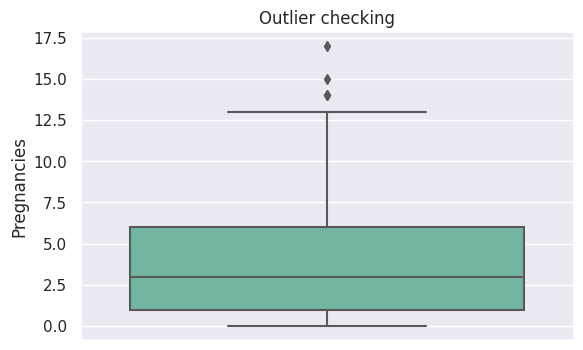

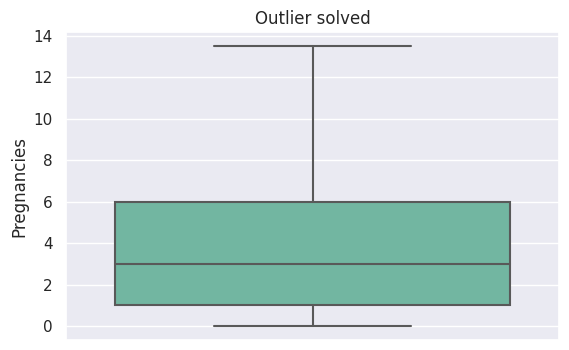

In [50]:
#column name - Pregnancies as Preg
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(y = "Pregnancies", data = df, palette ='Set2' )
plt.title("Outlier checking")

#######################
Preg_q1 = df['Pregnancies'].quantile(0.25)
Preg_q3 = df['Pregnancies'].quantile(0.75)
Preg_iqr = Preg_q3 - Preg_q1
Preg_upper = Preg_q3 + 1.5 * Preg_iqr
Preg_lower = Preg_q1 - 1.5 * Preg_iqr

df['Pregnancies'] = np.where(df['Pregnancies'] > Preg_upper,Preg_upper,
                                     np.where(df['Pregnancies'] < Preg_lower, Preg_lower,
                                            df['Pregnancies']) )

###############################################
plt.figure(figsize=(14,4))
plt.subplot(122)
sns.boxplot(y = "Pregnancies", data = df, palette ='Set2')
plt.title("Outlier solved")


plt.show()


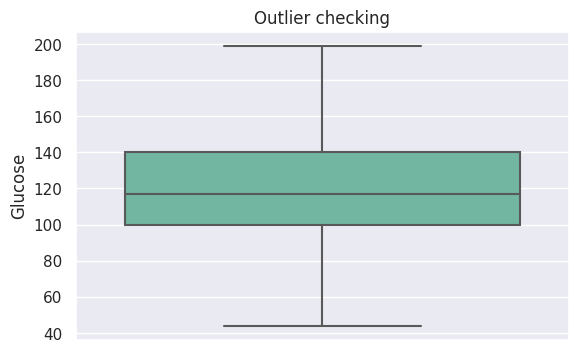

In [51]:
#column name - Glucose as Glu
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(y = "Glucose", data = df, palette ='Set2' )
plt.title("Outlier checking")

#######################


plt.show()

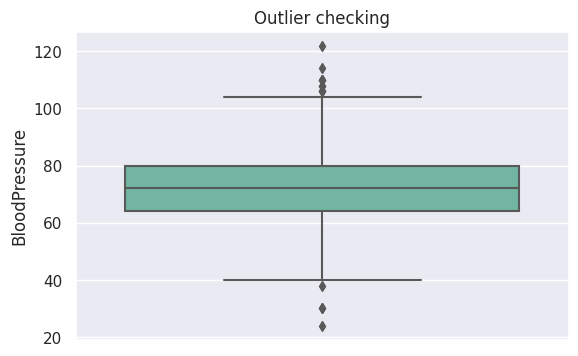

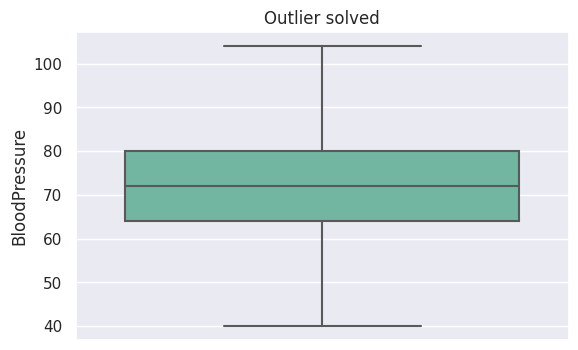

In [52]:
#column name - BloodPressure as blood
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(y = "BloodPressure", data = df, palette ='Set2' )
plt.title("Outlier checking")

#######################
blood_q1 = df['BloodPressure'].quantile(0.25)
blood_q3 = df['BloodPressure'].quantile(0.75)
blood_iqr = blood_q3 - blood_q1
blood_upper = blood_q3 + 1.5 * blood_iqr
blood_lower = blood_q1 - 1.5 * blood_iqr

df['BloodPressure'] = np.where(df['BloodPressure'] > blood_upper,blood_upper,
                                     np.where(df['BloodPressure'] < blood_lower, blood_lower,
                                            df['BloodPressure']) )

###############################################
plt.figure(figsize=(14,4))
plt.subplot(122)
sns.boxplot(y = "BloodPressure", data = df, palette ='Set2')
plt.title("Outlier solved")

plt.show()

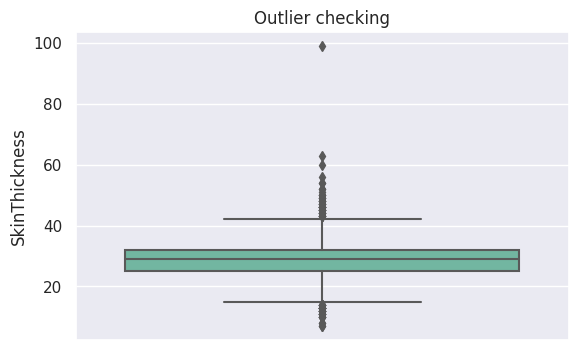

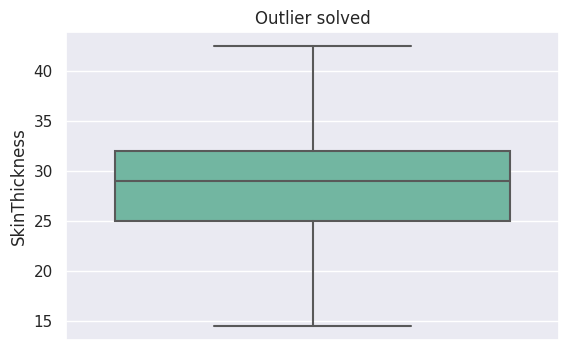

In [53]:
 #Column SkinThickness as Skin

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(y = "SkinThickness", data = df, palette ='Set2' )
plt.title("Outlier checking")


#######################
Skin_q1 = df['SkinThickness'].quantile(0.25)
Skin_q3 = df['SkinThickness'].quantile(0.75)
Skin_iqr = Skin_q3 - Skin_q1
Skin_upper = Skin_q3 + 1.5 * Skin_iqr
Skin_lower = Skin_q1 - 1.5 * Skin_iqr

df['SkinThickness'] = np.where(df['SkinThickness'] > Skin_upper,Skin_upper,
                                     np.where(df['SkinThickness'] < Skin_lower, Skin_lower,
                                            df['SkinThickness']) )

###############################################
plt.figure(figsize=(14,4))
plt.subplot(122)
sns.boxplot(y = "SkinThickness", data = df, palette ='Set2')
plt.title("Outlier solved")

plt.show()

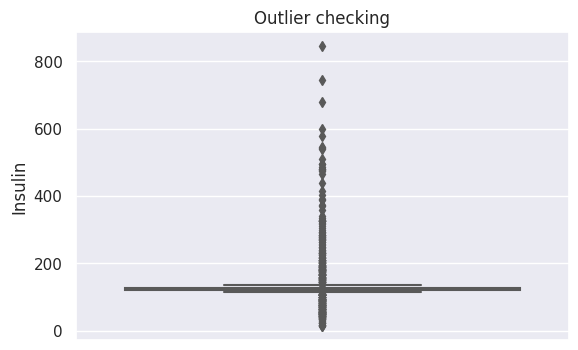

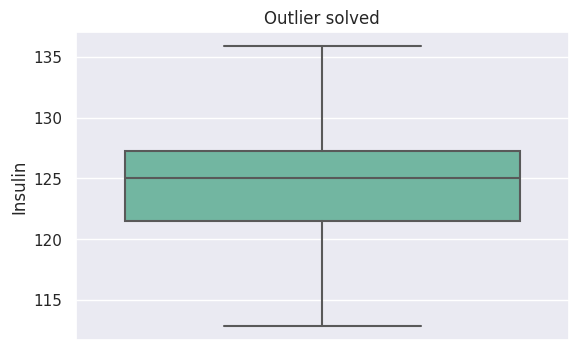

In [54]:
# Column Insulin as Insulin

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(y = "Insulin", data = df, palette ='Set2' )
plt.title("Outlier checking")


#######################
Insulin_q1 = df['Insulin'].quantile(0.25)
Insulin_q3 = df['Insulin'].quantile(0.75)
Insulin_iqr = Insulin_q3 -Insulin_q1
Insulin_upper = Insulin_q3 + 1.5 * Insulin_iqr
Insulin_lower = Insulin_q1 - 1.5 * Insulin_iqr

df['Insulin'] = np.where(df['Insulin'] > Insulin_upper,Insulin_upper,
                                     np.where(df['Insulin'] < Insulin_lower, Insulin_lower,
                                            df['Insulin']) )

###############################################
plt.figure(figsize=(14,4))
plt.subplot(122)
sns.boxplot(y = "Insulin", data = df, palette ='Set2')
plt.title("Outlier solved")

plt.show()


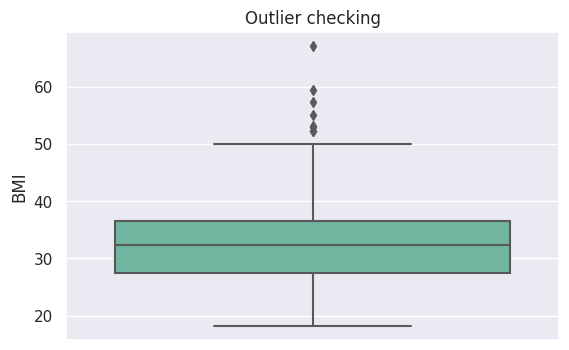

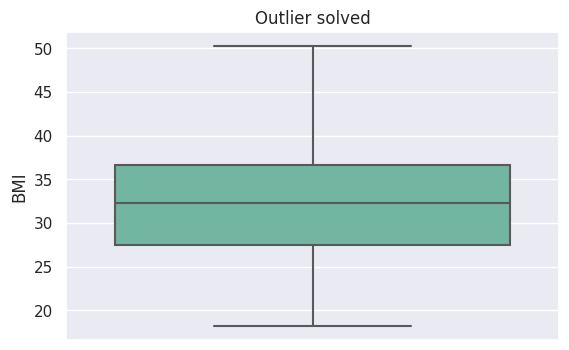

In [55]:
# Column BMI

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(y = "BMI", data = df, palette ='Set2' )
plt.title("Outlier checking")

#######################
BMI_q1 = df['BMI'].quantile(0.25)
BMI_q3 = df['BMI'].quantile(0.75)
BMI_iqr = BMI_q3 -BMI_q1
BMI_upper = BMI_q3 + 1.5 * BMI_iqr
BMI_lower = BMI_q1 - 1.5 * BMI_iqr

df['BMI'] = np.where(df['BMI'] > BMI_upper,BMI_upper,
                                     np.where(df['BMI'] < BMI_lower, BMI_lower,
                                            df['BMI']) )

###############################################
plt.figure(figsize=(14,4))
plt.subplot(122)
sns.boxplot(y = "BMI", data = df, palette ='Set2')
plt.title("Outlier solved")

plt.show()


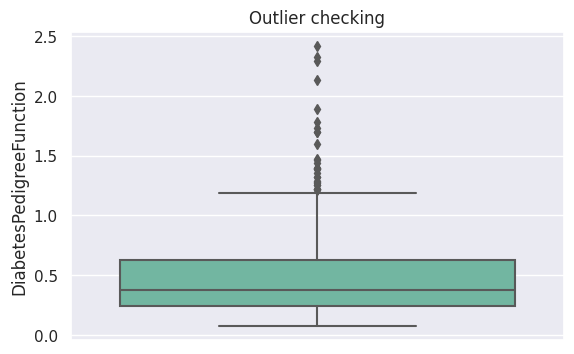

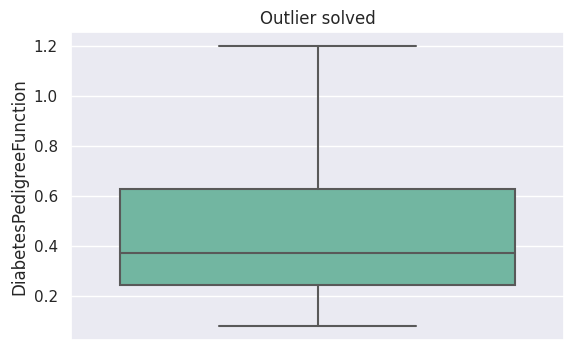

In [56]:
# column - DiabetesPedigreeFunction

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(y = "DiabetesPedigreeFunction", data = df, palette ='Set2' )
plt.title("Outlier checking")

#######################
DiabetesPedigreeFunction_q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
DiabetesPedigreeFunction_q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_q3 -DiabetesPedigreeFunction_q1
DiabetesPedigreeFunction_upper = DiabetesPedigreeFunction_q3 + 1.5 * DiabetesPedigreeFunction_iqr
DiabetesPedigreeFunction_lower = DiabetesPedigreeFunction_q1 - 1.5 * DiabetesPedigreeFunction_iqr

df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction'] > DiabetesPedigreeFunction_upper,DiabetesPedigreeFunction_upper,
                                     np.where(df['DiabetesPedigreeFunction'] < DiabetesPedigreeFunction_lower, DiabetesPedigreeFunction_lower,
                                            df['DiabetesPedigreeFunction']) )

###############################################
plt.figure(figsize=(14,4))
plt.subplot(122)
sns.boxplot(y = "DiabetesPedigreeFunction", data = df, palette ='Set2')
plt.title("Outlier solved")

plt.show()

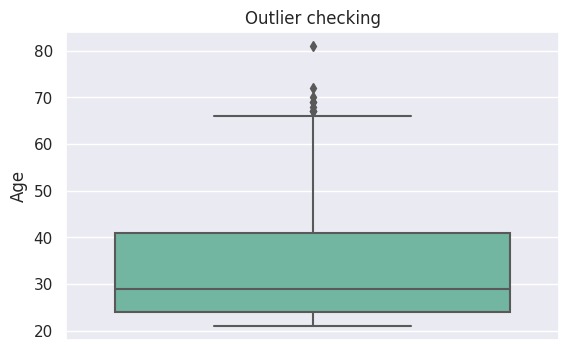

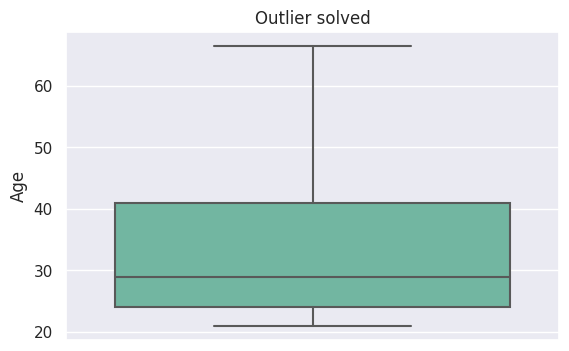

In [57]:
#Column - Age

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(y = "Age", data = df, palette ='Set2' )
plt.title("Outlier checking")

#######################
Age_q1 = df['Age'].quantile(0.25)
Age_q3 = df['Age'].quantile(0.75)
Age_iqr = Age_q3 -Age_q1
Age_upper = Age_q3 + 1.5 * Age_iqr
Age_lower = Age_q1 - 1.5 * Age_iqr

df['Age'] = np.where(df['Age'] > Age_upper,Age_upper,
                                     np.where(df['Age'] < Age_lower, Age_lower,
                                            df['Age']) )

###############################################
plt.figure(figsize=(14,4))
plt.subplot(122)
sns.boxplot(y = "Age", data = df, palette ='Set2')
plt.title("Outlier solved")

plt.show()

<Axes: >

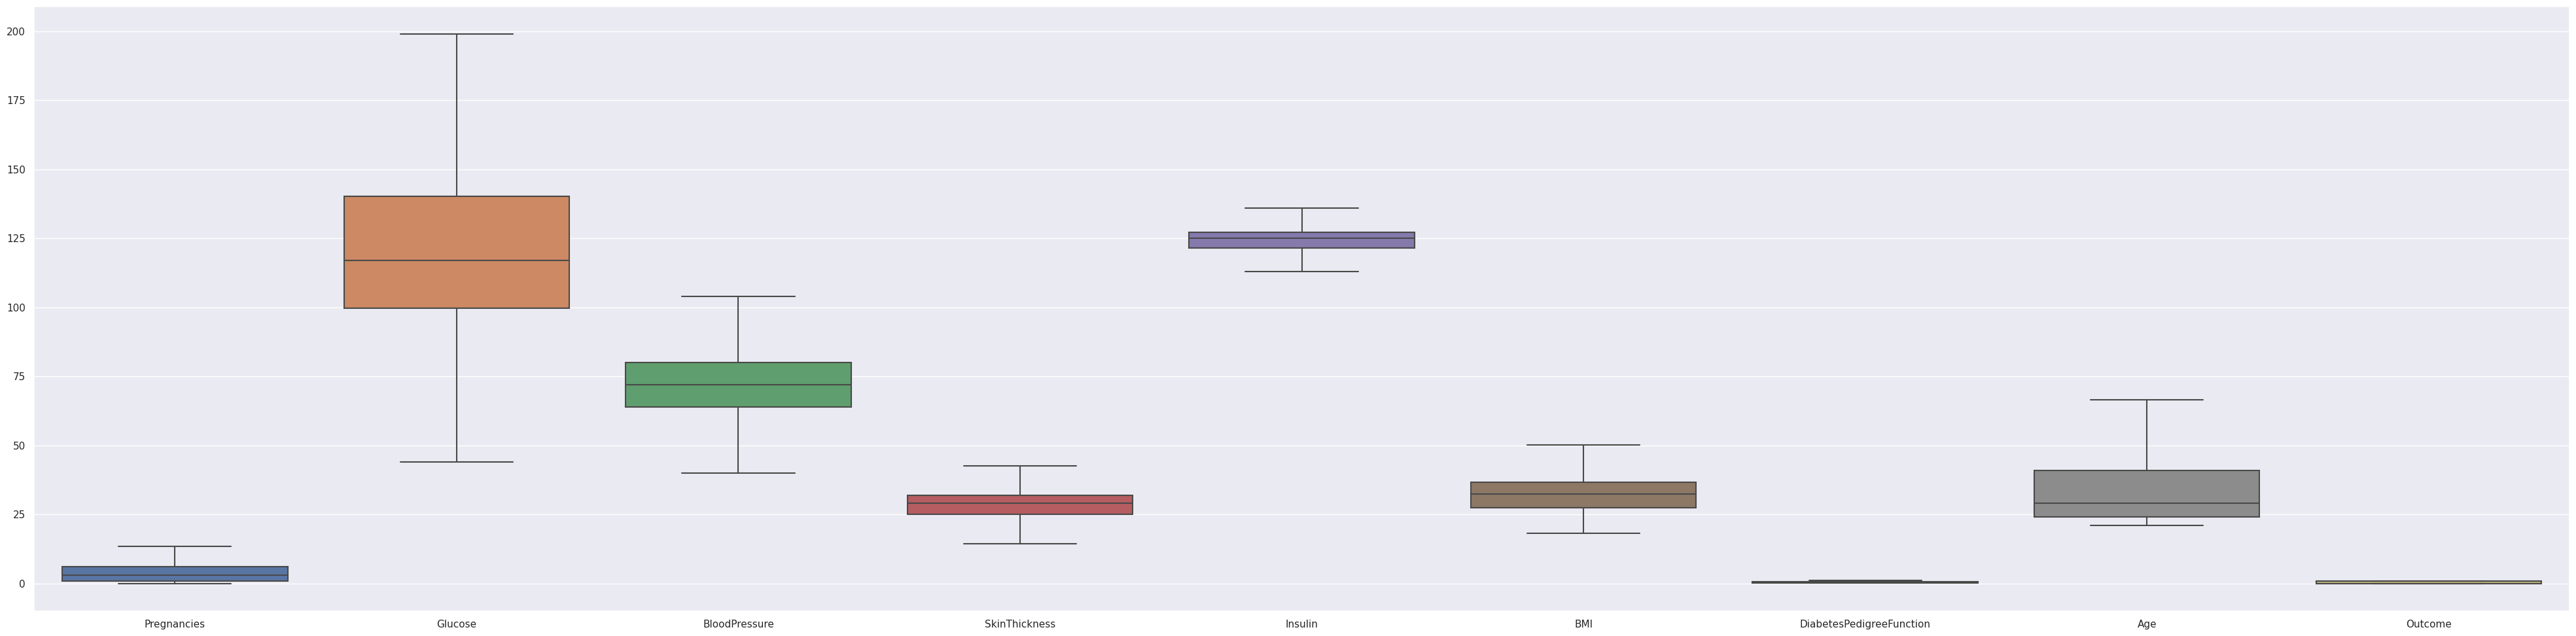

In [58]:
plt.figure(figsize=(50,12))
sns.boxplot(df)

**Normal Distribution check**Skewenss Check***

In [59]:
for i in df.columns:
  print(df[i].skew())

#skewness available

0.8539617478323778
0.5355873034111183
0.10566506007005463
-0.05764290402870092
-0.11822095592136406
0.34988208669393905
1.0244278033317116
1.0671703233262797
0.635016643444986


In [60]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


**Finding correlation**  it is not required for clinical dataset but just t see the graph

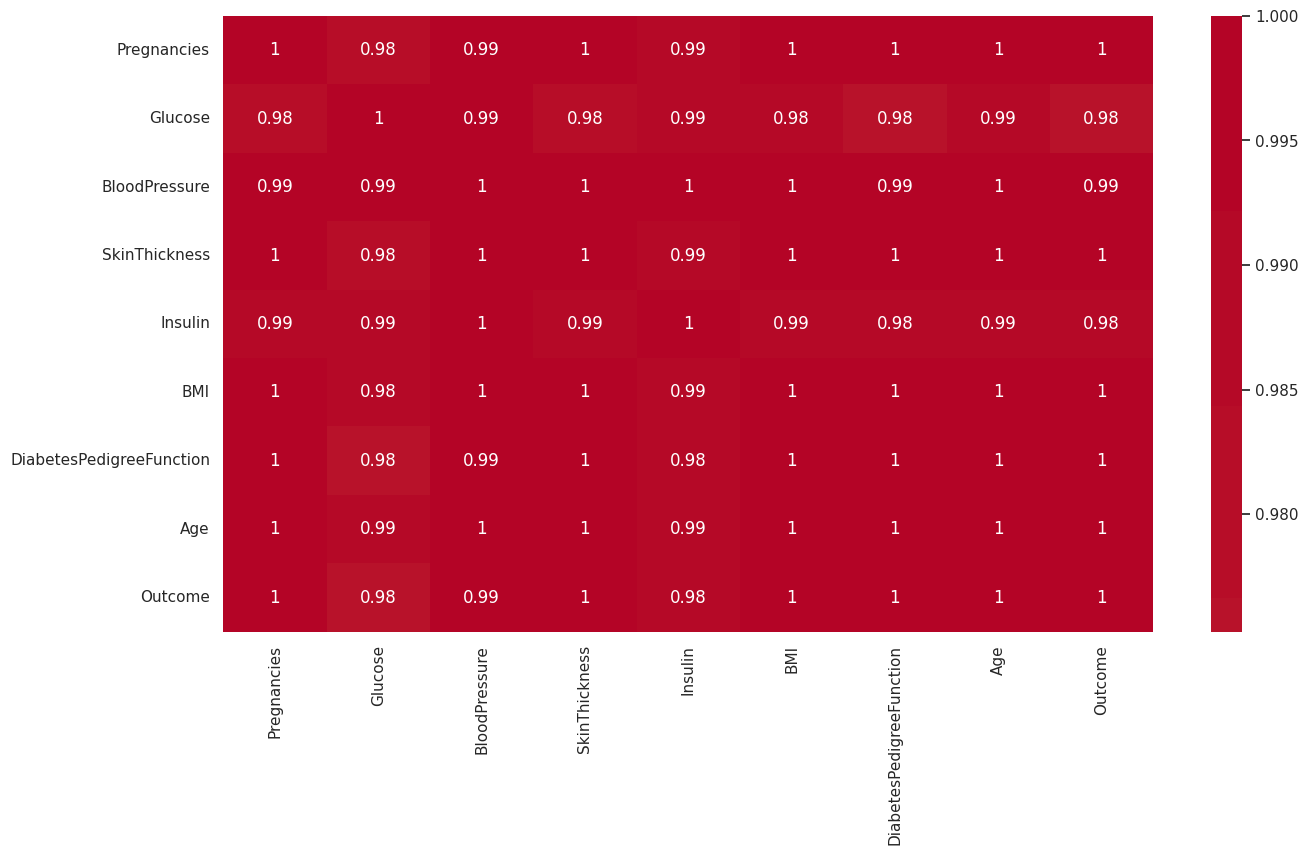

In [61]:
plt.figure(figsize=(15,8))
corr = df.describe().corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',center = 0)
plt.show()

**Visulize the data**

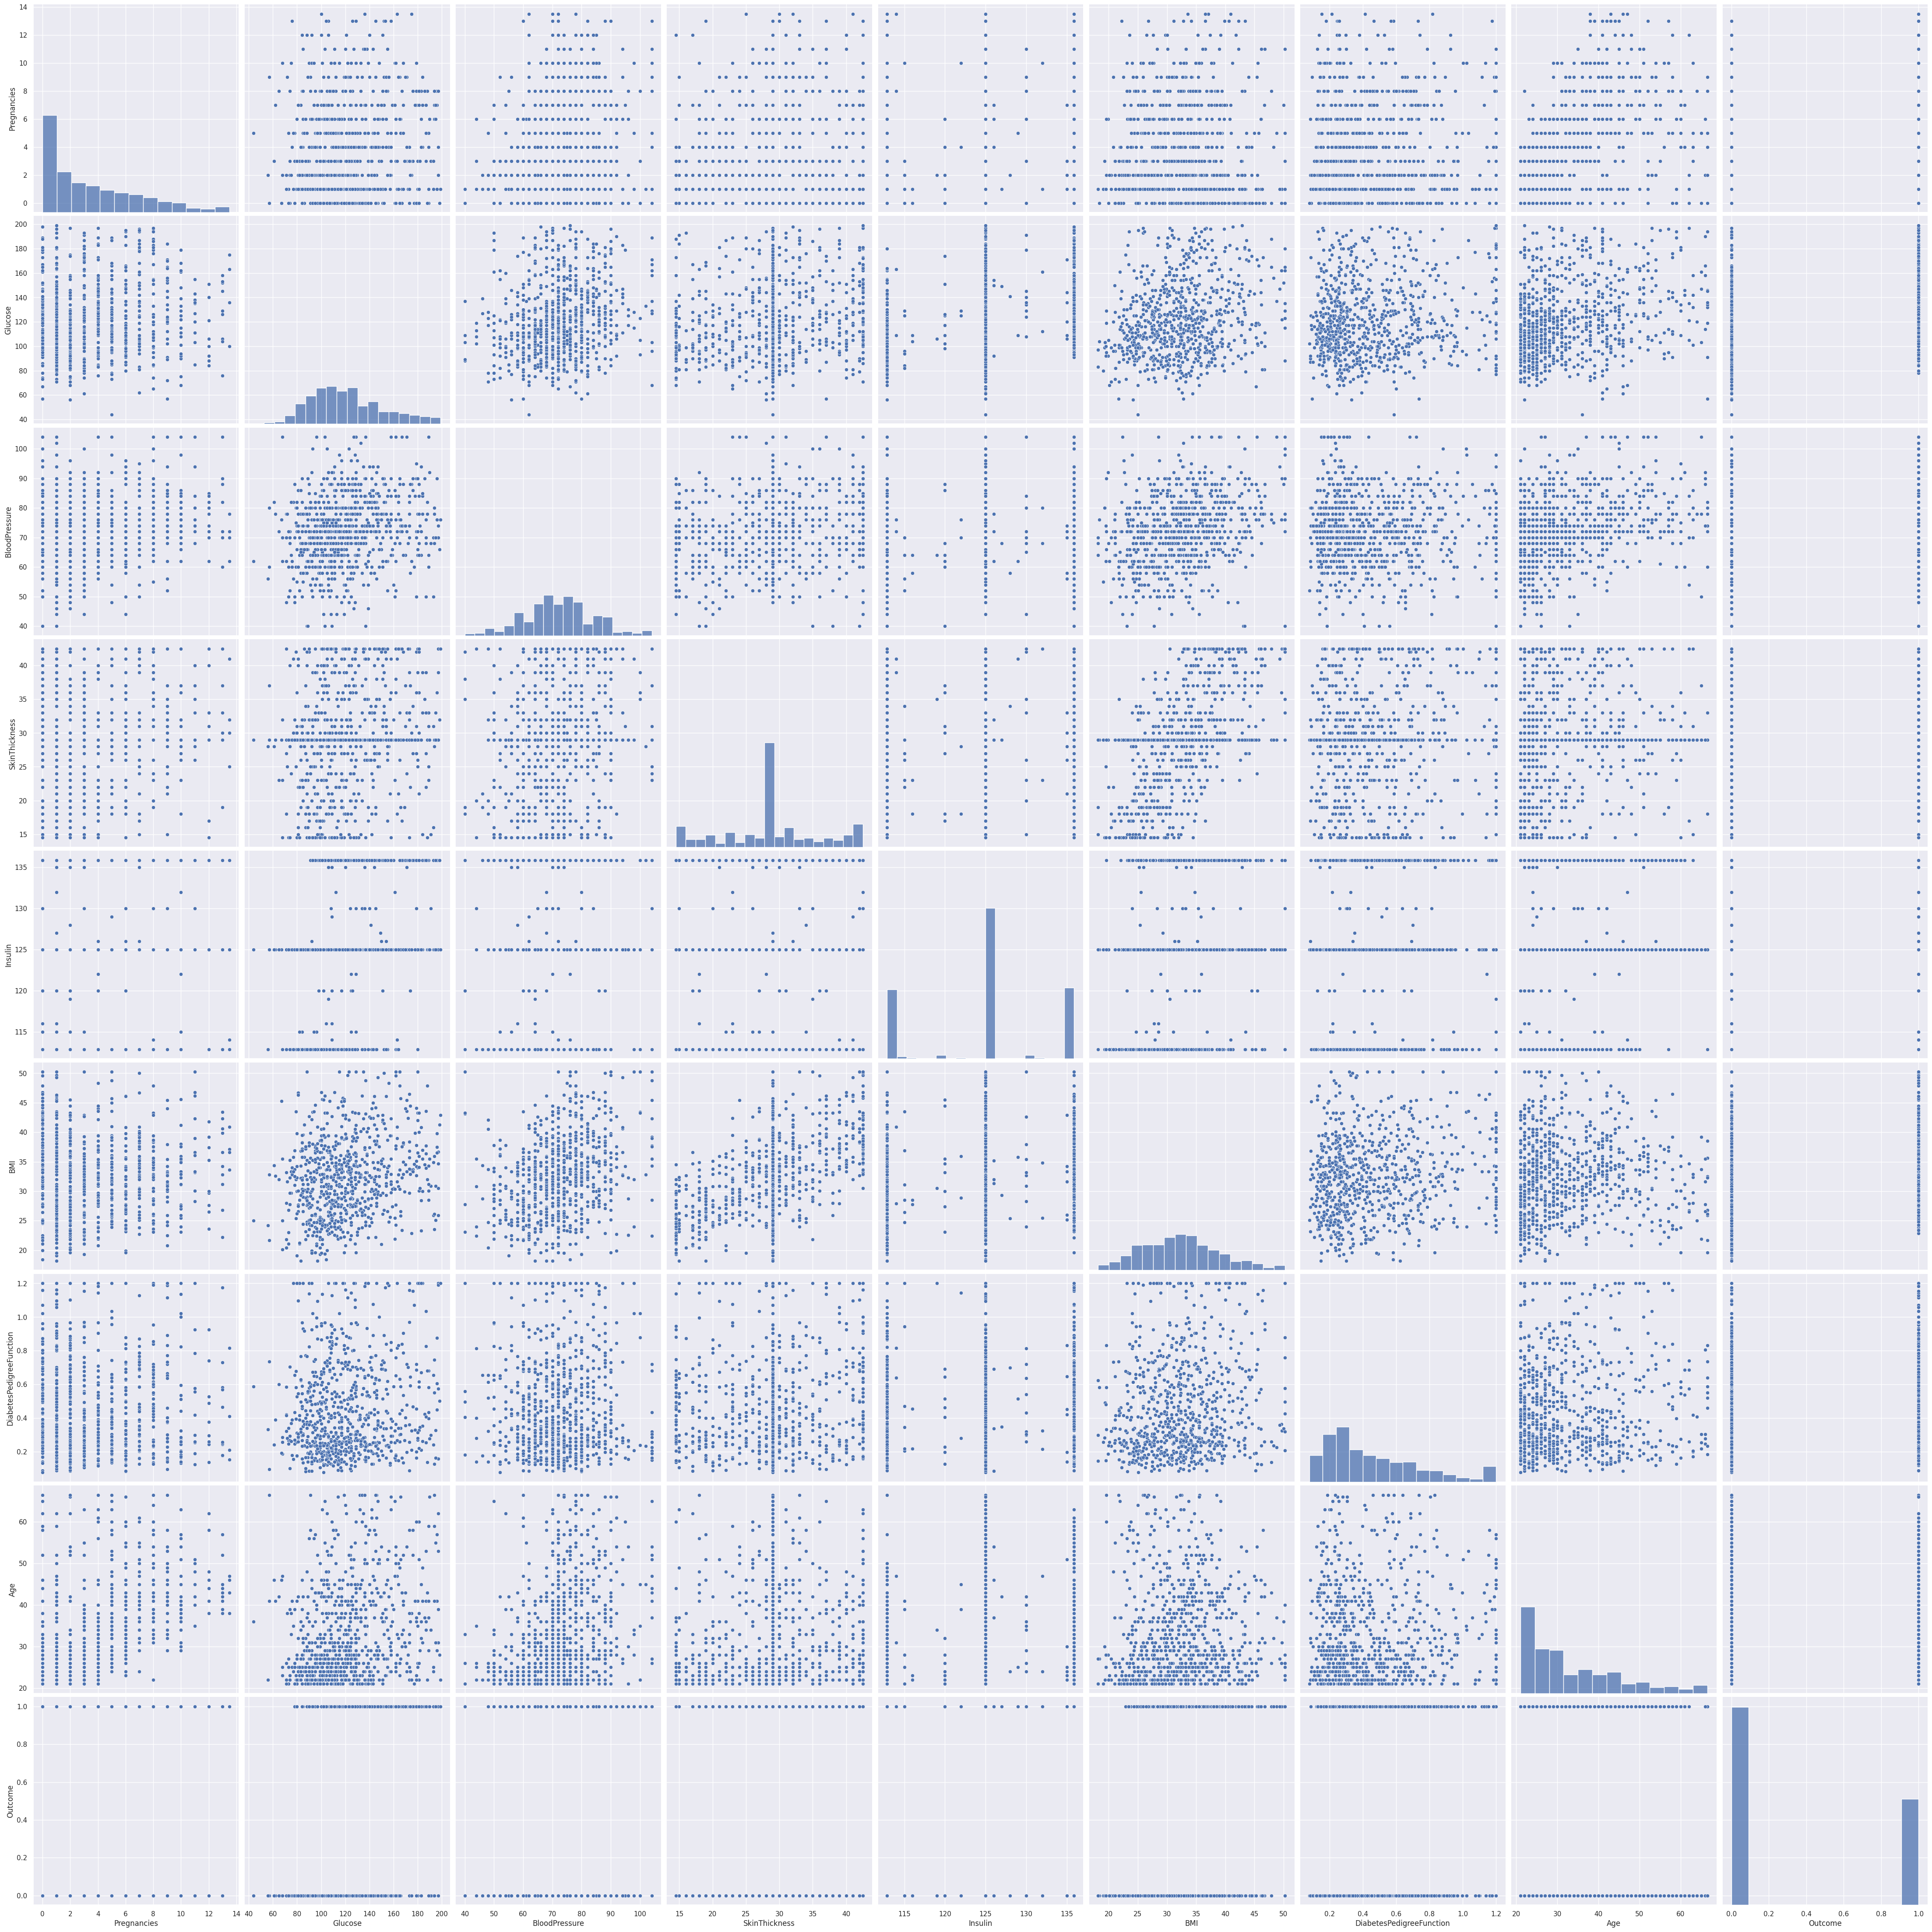

In [62]:
sns.pairplot(df, size = 5, kind = 'scatter')
plt.show()

Pair plot is indicating to use logistic classification model

In [74]:
pip install movecolumn

In [63]:
import movecolumn as mc
mc.MoveToLast(df,'Outcome')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,42.5,135.875,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,125.000,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.875,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.0,125.000,30.1,0.349,47.0,1


Spliting train test

In [64]:
x = df.iloc[:,0:-1]
y = df['Outcome']

Scailing the dataset

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

variable = sc_x
variable.shape

(768, 8)

imbalance dataset handling

In [66]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [67]:
# Smote method to handle imbalanced dataset

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x,y)
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [68]:
#scailing dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

variable = sc_x
variable.shape


(1000, 8)

Split the data into train and test

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.2, random_state=101)

**transform the data through yeo-johnson method**

In [70]:
from sklearn.preprocessing import PowerTransformer

pt1 = PowerTransformer(method='yeo-johnson')

x_train_transformed = pt1.fit_transform(x_train)
x_test_transformed = pt1.fit_transform(x_test)




Logistic regeression model

In [71]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train_transformed, y_train)
y_train_transformed_pred = logistic.predict(x_train_transformed)
y_test_transformed_pred = logistic.predict(x_test_transformed)

print(accuracy_score(y_train, y_train_transformed_pred))
print(accuracy_score(y_test, y_test_transformed_pred))


0.78125
0.76


Result : model accuracy without CVS - train(78 %) , test (76 %)


In [83]:
#CVS


training_accuracy = cross_val_score(logistic, x_train_transformed, y_train, cv=15)
test_accuracy = cross_val_score(logistic, x_test_transformed, y_test, cv=15)
print(training_accuracy[14])
print(test_accuracy[14])

0.8301886792452831
0.8461538461538461


Result : model accuracy with CVS - train(83 %) , test (84 %)

Performace matrix

In [72]:

print(classification_report(y_train, y_train_transformed_pred))
print(classification_report(y_test, y_test_transformed_pred))

print("_________________________________________________________")

print(confusion_matrix(y_train, y_train_transformed_pred))
print(confusion_matrix(y_test, y_test_transformed_pred))

print("_________________________________________________________")

print(roc_auc_score(y_train, y_train_transformed_pred))
print(roc_auc_score(y_test, y_test_transformed_pred))


              precision    recall  f1-score   support

           0       0.79      0.78      0.79       409
           1       0.77      0.78      0.78       391

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        91
           1       0.80      0.75      0.77       109

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

_________________________________________________________
[[320  89]
 [ 86 305]]
[[70 21]
 [27 82]]
_________________________________________________________
0.7812236194573503
0.7607621736062102


KNN Model - Mostly Data scientist used to prefer this model for cinical sector datset

In [76]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_transformed, y_train)

y_train_pred_knn = knn.predict(x_train_transformed)
y_test_pred_knn = knn.predict(x_test_transformed)

accuracy_knn_train = accuracy_score(y_train, y_train_pred_knn)
accuracy_knn_test = accuracy_score(y_test, y_test_pred_knn)
print(accuracy_knn_train)
print(accuracy_knn_test)


0.8275
0.76


In [80]:
#CVS

training_accuracy = cross_val_score(knn, x_train_transformed, y_train, cv=15)
test_accuracy = cross_val_score(knn, x_test_transformed, y_test, cv=15)
print(training_accuracy[2])
print(test_accuracy[2])

0.7777777777777778
0.7857142857142857
